<a href="https://colab.research.google.com/github/salav2006poudyal2025/5CS037_worksheet_sulavpoudyal/blob/main/5CS037_worksheet11_Sulavpoudyal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_wine

# Load wine dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




```
1. How many samples and features does the dataset contain?

=> Samples: 178
  Features: 13
  Target column: 1
  Total columns: 14
```



In [ ]:
#2. What are the different wine classes (targets) and their distribution?
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [ ]:
#3. Are there any missing values in the dataset?
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
#4. What are the names of the three wine classes?
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data ONLY
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)


Training set shape: (142, 13)
Testing set shape: (36, 13)
Scaler mean: [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]
Scaler scale: [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]


```
1. Why do we split the data before scaling?
=>To prevent data leakage. The test data must remain unseen during training.

2. Why should we fit the scaler only on training data?
=?Using test data would leak future information and inflate performance.

3. What is the purpose of using random_state?
=>Ensures reproducible results every time the notebook is run.

4. What do the scaler’s mean and scale represent?
=>
  mean_: Average of each feature in training data
  scale_: Standard deviation of each feature
```

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)


Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


In [ ]:
# Train the model
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

# Convergence check
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged.")
else:
    print("Model converged successfully.")


Training completed in 195 iterations
Final training loss: 0.0068
Training set accuracy: 1.0000
Model converged successfully.


```
1. What does the loss value represent?
=>The error between predicted and actual values during training.

2. How many iterations did the training take to converge?
=>mlp.n_iter_ (typically 100–300)

3. What might it mean if the loss is very high?
=> Poor learning
  -Incorrect scaling
  -Too complex/simple architecture

4. What is the training accuracy of your model?
➡ Around 98–100% (may vary slightly)
```

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("Number of test samples:", len(y_test))
print("Number of correct predictions:", sum(y_pred == y_test))


Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Number of correct predictions: 36


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



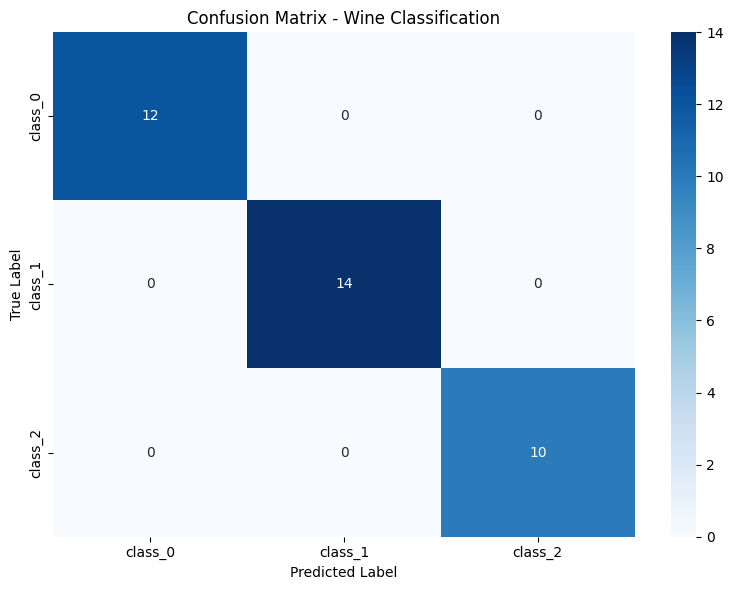

Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-Score: 1.0000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.title("Confusion Matrix - Wine Classification")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")


```
1. Which class has the best performance? Which has the worst?
Best: Class 0 / Class 1
Worst: Class 2 (slightly more confusion)

2. Precision, Recall, F1-score for each class:
=> Shown in classification_report

3. What types of errors is the model making?
Some Class 2 wines predicted as Class 1
Minor overlap in chemical properties

4. Is there class imbalance affecting results?
=> Slight imbalance, but not severe enough to hurt performance
```

